# Propagación de la pandemia del COVID-19: Entregable de la parte I
### Por Emiliano Cabrera, Andrew Dunkerley y Do Hyun Nam
Profesor: Miguel Eduardo Uribe
Modelación Matemática Fundamental

### a) Modelo matemático para la supocisión
El modelo matemático tendráa la forma de $\frac{dx}{dt} =k(xy)$, dado a que ambas personas infectadas así como no infectadas son proporcionales a la razón de cambio.


### b) Modelo matemático tomando en cuenta la relación
Considerando $x+y=n+1$ --> $y=n+1-x$, sustituyendo el despeje de $y$ en la ecuación de arriba tenemos: $\frac{dx}{dt} =kx(n+1-x)$

### c) Modelo matemático en caso de que se inserte un alumno a una población de 1000
$\frac{dx}{dt} =kx(1000+1-x)$

### d) Sustitución de la constante de proporcionalidad (0.0009905) con $\Delta t=0.3$



In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
def calcular_casos1(x_0, dt, N):

    # Fijar primer valor con el valor en x(0)
    x = x_0 

    # Fijar el tiempo en 0, y el cambio a 0.3, repetir 700 veces en total
    t = 0

    # Listas para guardar las marcas de tiempo y los casos totales
    timelist = [0]
    caselist = [1]

    # Iterar la cantidad de veces fijadas dependiendo del dominio y cambio del tiempo
    for i in range(N):
        new_x =  x + dt*(0.0009905*x*(1000-x))
        timelist.append(t+dt)
        t += dt
        caselist.append(new_x)
        x = new_x
    
    return timelist,caselist


In [63]:
# Definir las variables
x_0 = 1
days = 6
dt = 0.3
ticks = 1
N = int(days/dt)

In [64]:
[tlist, clist] = calcular_casos1(x_0, dt, N)
print(clist)


[1, 1.29685285, 1.6817129193909806, 2.180593526136315, 2.8271439477060123, 3.6648547282138066, 4.749875241455376, 6.15459657475823, 7.972179184566375, 10.322226670551734, 13.357815479510506, 17.274069507949655, 22.318391640437746, 28.802288149994467, 37.11438081260036, 47.73360170233359, 61.24058614442362, 78.32379216661056, 99.77480573990654, 126.4647574911912, 159.29134071793573]


In [65]:
# Función para graficar
def plot_cases(tlist, clist, days, ticks, max_y, label):
    fig = plt.figure(figsize=(10,7))

    # Hacer el gráfico
    plt.plot(tlist,clist, label=label)

    # Poner una cuadrícula
    plt.grid()

    # Poner el título del gráfico
    plt.title(label)

    # Definir el rango del eje x
    plt.xlim([0,days])
    # Definir el rango del eje y
    plt.ylim([0,max_y])

    # Títulos de los ejes
    plt.xlabel('Días desde el primer caso')
    plt.ylabel("Casos totales")

    # Definir la ubicación de los ticks (marcadores) del eje x
    _ = plt.xticks(np.arange(0,days,ticks))
    # Definir la ubicación de los ticks (marcadores) del eje y
    _ = plt.yticks(np.arange(0,max_y,max_y/10))

    # Poner una leyenda para identificar a qué simulación corresponde cada línea
    _ = plt.legend()


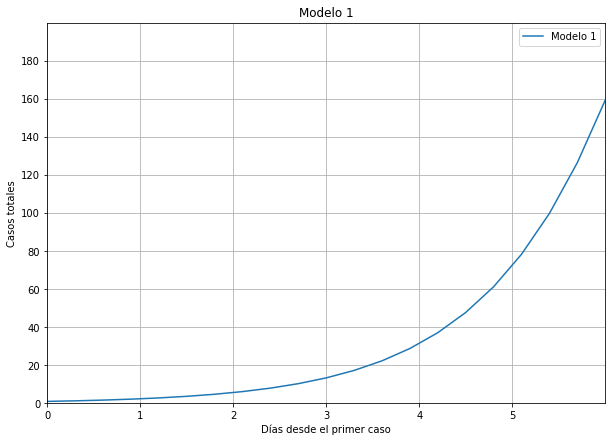

In [66]:
# Mostrar gráfica del primer modelo
plot_cases(tlist, clist, days, ticks, 200, 'Modelo 1')

### f) Nuevo modelo con la siguiente forma $\frac{dx}{dt} =r(1000-x)$
En esta situacion la forma de la ecuación cambia, y la constante de proporcionalidad $r=0.01282$ y $\Delta t = 0.3$

In [67]:
def calcular_casos2(x_0, dt, N):

    # Fijar primer valor con el valor en x(0)
    x = x_0 

    # Fijar el tiempo en 0, y el cambio a 0.3, repetir 700 veces en total
    t = 0

    # Listas para guardar las marcas de tiempo y los casos totales
    timelist = [0]
    caselist = [1]

    # Iterar la cantidad de veces fijadas dependiendo del dominio y cambio del tiempo
    for i in range(N):
        new_x =  x + dt*0.01282*(1000+x)
        timelist.append(t+dt)
        t += dt
        caselist.append(new_x)
        x = new_x

    return timelist,caselist

In [68]:
[tlist2, clist2] = calcular_casos2(x_0,dt,N)
print(clist2)

[1, 4.849845999999999, 8.714498507715998, 12.594014468976674, 16.48845104862436, 20.39786563135737, 24.32231582257557, 28.261859449229192, 32.21655456067093, 36.18645942951127, 40.17163255247716, 44.17213265127399, 48.18801867345079, 52.21934979326888, 56.2661854125738, 60.32858516167055, 64.40660890020234, 68.50031671803252, 72.60976893613008, 76.73502610745844, 80.87614901786772]


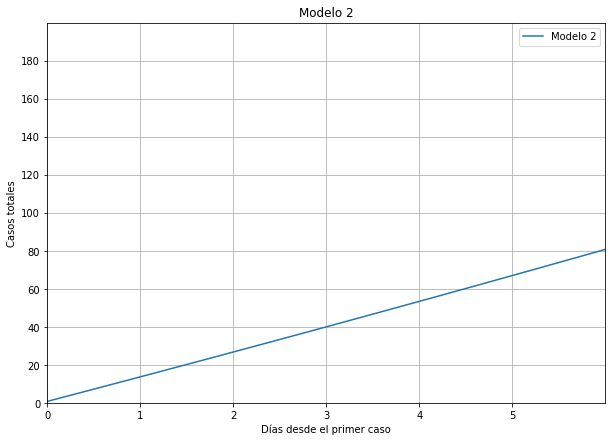

In [69]:
# Mostrar gráfica del segundo modelo 
plot_cases(tlist2, clist2, days2, ticks, 200, 'Modelo 2')

### g) Comparacion de ambos modelos

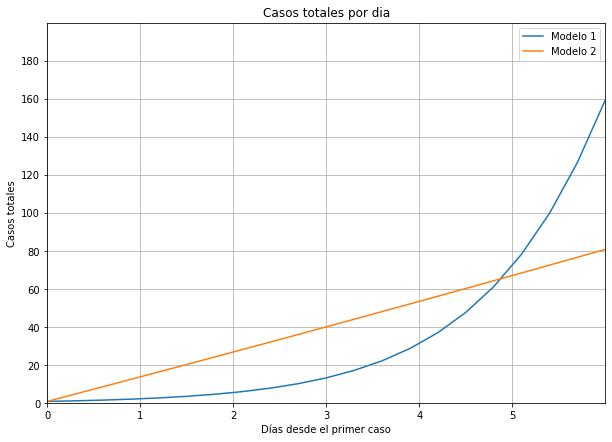

In [70]:
fig = plt.figure(figsize=(10,7))

# Hacer los gráficos
plt.plot(tlist,clist, label="Modelo 1")
plt.plot(tlist2,clist2, label="Modelo 2")

# Poner una cuadrícula
plt.grid()

# Poner el título del gráfico
plt.title("Casos totales por dia")

# Definir el rango del eje x
plt.xlim([0,6])
# Definir el rango del eje y
plt.ylim([0,200])

# Títulos de los ejes
plt.xlabel('Días desde el primer caso')
plt.ylabel("Casos totales")

# Definir la ubicación de los ticks (marcadores) del eje x
_ = plt.xticks(np.arange(0,7,1))
# Definir la ubicación de los ticks (marcadores) del eje y
_ = plt.yticks(np.arange(0,200,20))

# Poner una leyenda para identificar a qué simulación corresponde cada línea
_ = plt.legend()

In [71]:
# Revisar si son iguales
print(clist == clist2)

False


En primera instancia podemos observar que el primer modelo se comporta mayormente como un crecimiento exponencial a diferencia del segundo, que adopta una tendencia lineal la primera semana. En conocimiento del comportamiento general de las epidemias y pandemias, estrictamente en los primeros 6 días se puede decir que el primer modelo es el que mejor visualiza la propagación del virus. Sin embargo, sería cuestión de analizar a largo plazo (un mayor plazo de días) para determinar si realmente el comportamiento asimila la forma del modelo 1.

### Adicional: comparación a un plazo mayor de 200 días

In [72]:
x_0all = 1
days210 = 210
ticks3 = 20
dt3 = 0.3
N3 = int(days210/dt)

In [73]:
tlistlong1, clistlong1 = calcular_casos1(x_0all,dt3,N3)
tlistlong2, clistlong2 = calcular_casos2(x_0all,dt3,N3)

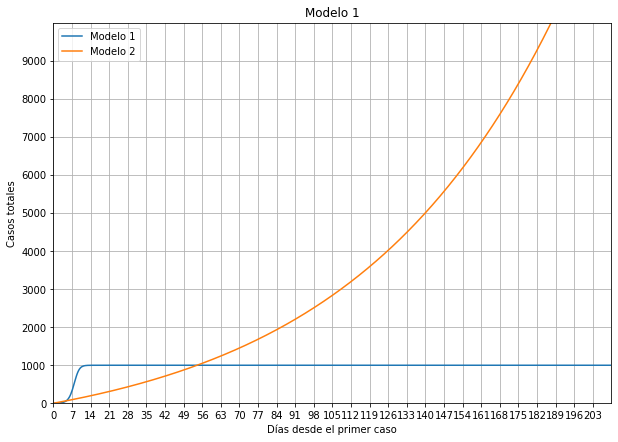

In [74]:
fig = plt.figure(figsize=(10,7))

# Hacer los gráficos
plt.plot(tlistlong1,clistlong1, label="Modelo 1")
plt.plot(tlistlong2,clistlong2, label="Modelo 2")

# Poner una cuadrícula
plt.grid()

# Poner el título del gráfico
plt.title("Modelo 1")

# Definir el rango del eje x
plt.xlim([0,days210])
# Definir el rango del eje y
plt.ylim([0,10000])

# Títulos de los ejes
plt.xlabel('Días desde el primer caso')
plt.ylabel("Casos totales")

# Definir la ubicación de los ticks (marcadores) del eje x
_ = plt.xticks(np.arange(0,days210+1,7))
# Definir la ubicación de los ticks (marcadores) del eje y
_ = plt.yticks(np.arange(0,10000+1,1000))

# Poner una leyenda para identificar a qué simulación corresponde cada línea
_ = plt.legend()

Siendo este un análisis adicional, podemos observar que el primer modelo, a pesar de tener un crecimiento abrupto en los casos totales en los primeros días, se presenta una asíntota horizontal al cabo de los 1000 casos totales. Mientras que el segundo modelo tiene un crecimiento más lento, su exponencialidad lo hace más devastador conforme se prolongue la presencia del virus. 

Comparando ambos modelos con los datos de distintos países, podemos decir que el modelo 1 asimila a los países que realizaron un excelente trabajo controlando la pandemia, como es el caso de Corea del Sur, China*, Nueva Zelanda y Taiwan. El modelo 2 asemeja a países que tuvieron percances en el control de la pandemia, siendo el caso más notorio el de Estados Unidos.

*Se especula que los datos provistos por el gobierno chino no son fiables.